In [2]:
# Downloading utils
!wget https://raw.githubusercontent.com/Zahlii/colab-tf-utils/master/utils.py

--2020-06-05 12:53:07--  https://raw.githubusercontent.com/Zahlii/colab-tf-utils/master/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6935 (6.8K) [text/plain]
Saving to: ‘utils.py’

utils.py            100%[===================>]   6.77K  --.-KB/s    in 0s      

2020-06-05 12:53:07 (63.8 MB/s) - ‘utils.py’ saved [6935/6935]



In [43]:
# Installing livelossplot 
pip install livelossplot

In [44]:
# Importing required libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
import cv2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
from livelossplot import PlotLossesKerasTF
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.2.0


In [0]:
# Unzipping the file
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/My Drive/dopISneuSBGKSEp3rhgRew_d24af2d5210545f89c6639f42e84c1b3_Project.zip", 'r')
zip_ref.extractall()
zip_ref.close()

In [46]:
# Details of training data
for expression in os.listdir("/content/Project/train"):
    print(str(len(os.listdir("/content/Project/train/" + expression))) + " " + expression + " images")

3995 angry images
4965 neutral images
4830 sad images
3171 surprise images
4097 fear images
7214 happy images
436 disgust images


In [47]:
# Details of test data
for expression in os.listdir("/content/Project/test"):
    print(str(len(os.listdir("/content/Project/test/" + expression))) + " " + expression + " images")

958 angry images
1233 neutral images
1247 sad images
831 surprise images
1024 fear images
1774 happy images
111 disgust images


In [48]:
# Reading an image
image_=cv2.imread("/content/Project/train/angry/Training_10131352.jpg")
image_.shape

(48, 48, 3)

In [49]:
# Reading data from directories
img_size = 48
batch_size = 64

datagen = ImageDataGenerator(horizontal_flip=True)

train = datagen.flow_from_directory("/content/Project/train", target_size=(img_size,img_size), color_mode="grayscale",
                                    batch_size=batch_size, class_mode='categorical', shuffle=True)
validation = datagen.flow_from_directory("/content/Project/test", target_size=(img_size,img_size), color_mode="grayscale",
                                         batch_size=batch_size, class_mode='categorical', shuffle=False)


Found 28708 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [0]:
# Initialising the CNN
model = Sequential()

# 1st Convolution layer
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 3rd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))


In [0]:
#Compiling the model
optimizer=Adam(lr=0.0005)
model.compile(optimizer=optimizer, metrics=['accuracy'], loss='categorical_crossentropy')


In [59]:
# Summary of the model
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_43 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
activation_43 (Activation)   (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_43 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_44 (Batc (None, 24, 24, 128)      

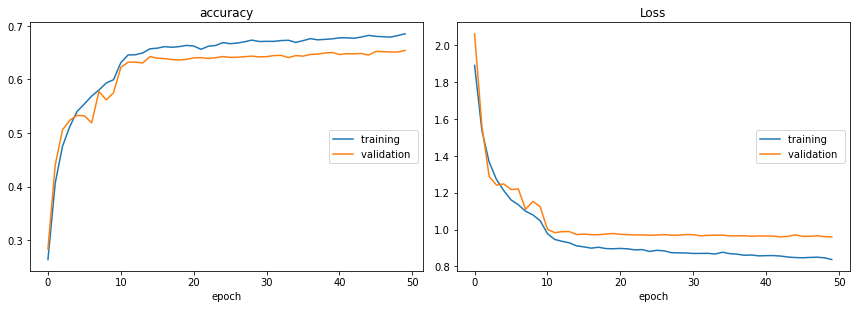

accuracy
	training         	 (min:    0.264, max:    0.685, cur:    0.685)
	validation       	 (min:    0.283, max:    0.654, cur:    0.654)
Loss
	training         	 (min:    0.837, max:    1.892, cur:    0.837)
	validation       	 (min:    0.960, max:    2.064, cur:    0.960)

Epoch 00050: saving model to model_weights.h5
448/448 [==============================] - 29s 65ms/step - loss: 0.8370 - accuracy: 0.6852 - val_loss: 0.9600 - val_accuracy: 0.6542 - lr: 1.0000e-05


In [60]:
# Training the model and saving model weights
epochs = 50
steps_per_epoch = train.n//train.batch_size
validation_steps = validation.n//validation.batch_size

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=0.00001, mode='auto')
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy', save_weights_only=True, mode='max', verbose=1)
callbacks = [PlotLossesKerasTF(), checkpoint, reduce_lr]

history = model.fit(
    x=train,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data = validation,
    validation_steps = validation_steps,
    callbacks = callbacks
)

In [0]:
# Saving model architectute
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)